In [1]:
pip install imbalanced-learn

You should consider upgrading via the '/Users/mahmutgemici/miniconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas 
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [3]:
df= pandas.read_csv("PitchPineMortality.csv")

In [4]:
df.head()

,Shortname,CLASS,Status,Fire,Type,Diameter_cm,Height_m,2013 status,2014 Status,Response
0,B5-012814-1,1,Pre,0,nf,14,5,live,live,0
1,B5-012814-1,1,Pre,0,nf,13,7,live,live,0
2,B5-012814-1,1,Pre,0,nf,5,3,live,live,0
3,B5-012814-1,1,Pre,0,nf,13,7,live,live,0
4,B5-012814-1,1,Pre,0,nf,6,4,live,live,0


In [5]:
df.columns

Index(['Shortname', 'CLASS', 'Status', 'Fire', 'Type', 'Diameter_cm',
       'Height_m', '2013 status', '2014 Status', 'Response'],
      dtype='object')

In [6]:
df = pandas.get_dummies(df, columns=["Type"], prefix=["Type is"] )
df = pandas.get_dummies(df, columns=["Status"], prefix=["Status is"] )

In [7]:
x=df[['CLASS', 'Fire', 'Diameter_cm', 'Height_m',
       'Response', 'Type is_nf', 'Type is_rxb', 'Type is_wf',
       'Status is_Plus 1', 'Status is_Post+1', 'Status is_Pre']]

y=df["Response"]     

In [8]:
x

,CLASS,Fire,Diameter_cm,Height_m,Response,Type is_nf,Type is_rxb,Type is_wf,Status is_Plus 1,Status is_Post+1,Status is_Pre
0,1,0,14,5,0,1,0,0,0,0,1
1,1,0,13,7,0,1,0,0,0,0,1
2,1,0,5,3,0,1,0,0,0,0,1
3,1,0,13,7,0,1,0,0,0,0,1
4,1,0,6,4,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2653,1,1,11,10,0,0,1,0,0,0,1
2654,1,1,23,14,0,0,1,0,0,0,1
2655,1,1,10,10,0,0,1,0,0,0,1
2656,1,1,15,13,0,0,1,0,0,0,1


In [9]:
x=x.astype(float)
x.columns
len(x)

2658

In [10]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
oversample = RandomOverSampler(sampling_strategy=0.5)
X, Y = oversample.fit_resample(x, y)
len(X)

3453

In [11]:
df["Response"].describe()

count    2658.000000
mean        0.133935
std         0.340647
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64

In [12]:
model = Sequential()
model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history=model.fit(X, Y, epochs=40, batch_size=64,validation_split=0.25)

Epoch 1/40
41/41 [==============================] - 0s 5ms/step - loss: 0.4421 - accuracy: 0.8648 - val_loss: 1.0605 - val_accuracy: 0.3310
Epoch 2/40
41/41 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8919 - val_loss: 1.0450 - val_accuracy: 0.4236
Epoch 3/40
41/41 [==============================] - 0s 1ms/step - loss: 0.2675 - accuracy: 0.9085 - val_loss: 0.9921 - val_accuracy: 0.5127
Epoch 4/40
41/41 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9143 - val_loss: 0.8717 - val_accuracy: 0.5532
Epoch 5/40
41/41 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9204 - val_loss: 0.8923 - val_accuracy: 0.5579
Epoch 6/40
41/41 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9204 - val_loss: 0.8088 - val_accuracy: 0.5833
Epoch 7/40
41/41 [==============================] - 0s 2ms/step - loss: 0.1959 - accuracy: 0.9235 - val_loss: 0.8338 - val_accuracy: 0.5775
Epoch 8/40
41/41 [==

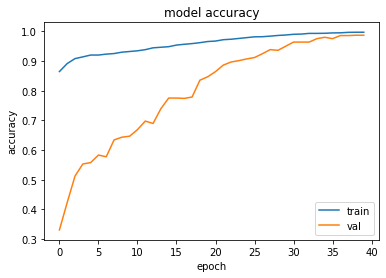

In [14]:

import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

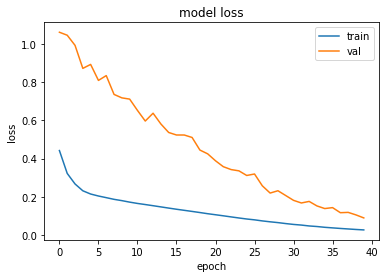

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()